# Neural networks and deep learning

URL: http://neuralnetworksanddeeplearning.com/index.html

# Chapter 1: Recognizing handwritten digits

## Perceptrons

* A type of artificial neuron
* Takes in some binary inputs, and has a binary output
* The output (0 or 1) is determined by the weighted sum of the inputs being greater than some threshold ($\sum_j w_jx_j$ > thresold)

E.g., there is a music concert. We think of 3 features:

1. Do I like the music?
2. Is it far?
3. Is it expensive?

We assign an important to all of these (weights), and then take a weighted sum. If it's over some value, I go to the concert.

Now, we could update the definition of the peceptron a bit. If we moved the threshold to the other side of the equation and think of it instead as a bias, we something more familiar:

$w\cdot{x} + bias > 0$, then output 1 (where $w\cdot{x}$ is our weighted sum).

Conceptually, the bias can be thought of as how easy it is to get the perceptron to activate.

## Sigmoid neurons

Imagine we are designing a network to learn handwriting recognition, and we want to tweak our weights to improve it.
Well, what we want is for a small change in any weight (or bias) to result in only a small change to our output.

The problem with perceptrons is that a small change in any weight or bias can cause the output to flip from 0 to 1, and that can then cause another perceptron to flip from 0 to 1, etc. So even a small change can have a big effect.

So we use another kind of neuron: __the sigmoid neuron__.
Sigmoid neurons are like perceptrons, but a key property is that a small change to a weight or bias only results in a small change to the output.

* Sigmoid neurons and cake in any value between 0-1
* Their output is $\sigma(w\cdot{x}+b)$
* The output will also be any number between 0-1

$\sigma$ is the function that squishes values into 0-1. A.k.a, the _logistic function_. Due to this alternate terminology, sigmoid neurons are sometimes called _logistic neurons_.

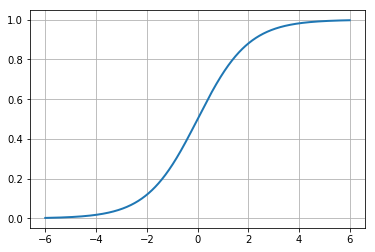

In [1]:
# The sigmoid function aka logistic function
# Sigmoid will be close to 0 when -ve, and close to 1 when +ve
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    # Apply sigmoid activation function
    return 1/(1+np.exp(-z))

test_input = np.arange(-6, 6, 0.01)
plt.plot(test_input, sigmoid(test_input), linewidth=2)
plt.grid(1)

Note how the sigmoid function looks like a smoothed out binary step function, where anything > 0 becomes one. So we can kinda think of a sigmoid neuron as a "smoothed out" perceptron.

_Note: Sigmoid is a common activation function, but there are others._


## The architecture of neural networks

* __Feedforward neural networks__: The output from one neuron becomes the input to another. Information always go forward -- there is no feedback/loops.

* Input layer
* Output layer
* Hidden layer (any layer which is not an input or output layer)


## A simple network to classify handwritten digits

To classify a string of digits, we must do 2 things:

1. Split the string into individual digits (_segmentation_)
2. Classify each digit

We'll focus on 2.

The network will be structured as follows:

1. Input layer: 784 neurons, one for each pixel in a 28*28 pixel image. Each input is the grayscale value of a neuron, where 0.0 = white and 1.0 = black
2. A hidden layer containing _n_ neurons
3. A 10 neuron output layer. If the output of the first neuron is ~1, then the network thinks the input digit is a 1, etc. I.e., we check for the highest-valued neuron in this layer to see which digit has been recognized.

<img src="images/neural_net_deep_learning/net1.jpg" width="450">


## Learning with gradient descent

Use $x$ to denote a training input (i.e., grayscale image of a character).
Each training input can be thought of as a 28x28 = 784 dimensional vector. Each entry in the vector represents the grayscale value for a pixel in the image.

We'll denote the output as $y=y(x)$ where y is a 10 dimensional vector.
For example, if training image $x$ denotes a 6, then $y(x) = (0, 0, 0, 0, 0, 0, 1, 0, 0, 0)^T$. (Note the $^T$ just denotes transforming the row vector into a column vector.)

Now, we want to find all the weights and biases that for any given input will give us our desired output.

To measure how well we're doing, we'll define a __cost function__ (aka _loss_ or _objective_ function).

* Cost function: A function that measures how accurate your function is

Here is our cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

* $w$ = all weights
* $b$ = all biases
* $x$ = input
* $n$ = number of training inputs
* $a$ = vector of outputs (since this is the output, it depends on $x$, $y$, and $b$

$\parallel{v}\parallel$ denotes the length of a vector.

We'll call C the _quadratic cost function_, aka, _Mean Squared Error_ or just _MSE_ function.

Things to note:

* The value will always be positive since we $^2$ the difference
* The value will be close to 0 when $y(x)$ and $a$ are almost equal
* I.e., the closer the function is to 0, the better our network is working

So, we want to find a set of weights and biases that make the cost function as low as possible.

The algorithm for finding the weights and biases that make the cost function as low as possible is known as __gradient descent__.

For now, forget about the network, sigmoid, etc., etc., and just focus on how we can minimize a function using gradient descent.

Let's just imagine a surface defined by 2 variables. We want to move down the surface until we reach the bottom, and then we know which two variables _minimize_ the function.

<img src="images/neural_net_deep_learning/multivarfunc.jpg" width="450">

In the diagram above, what happens when we move the ball some small amount $\Delta{v1}$ in the $v1$ direction, and some small amount $\Delta{v2}$ in the $v2$ direction? According to calculus:

$\Delta{C} = \frac{\delta{C}}{\delta{v_1}}\Delta{v_1} + \frac{\delta{C}}{\delta{v_2}}\Delta{v_2}$


The change in C = the change in C with respect to V1 * the change in V1 + the change in C with respect to V2 * the change in V2

We want to choose $\Delta{v_1}$ and $\Delta{v_2}$ so as to make C negative -- to move down our slope/minimize our cost function.

(Hint: Recall that the gradient of a function -- all of the partial derivatives stuffed into a vector -- gives you the slope of steepest ascent.)

Let's define:

$\Delta{v} = (\Delta{v_1}, \Delta{v_2})^T$ = the column vector of changes to the $v$ variables

$\nabla{C} = (\frac{\delta{C}}{\delta{v_1}}, \frac{\delta{C}}{\delta{v_2}})^T$ = gradient of C = the column vector of partial derivatives

Recall $\nabla$ tells you something is a gradient vector -- a vector of partial derivatives.

Anyway, this let's us rewrite:

$\Delta{C} = \nabla{C}\cdot{\Delta{v}}$

Or in English: the change in C is given by the gradient of C * the change in directions.

So, to move "down" the function -- the reduce our cost -- we just need to choose $v$ such that:

$v \to v' = v-\eta{\nabla{C}}$, where $\eta$ (eta) is some small, positive parameter (known as the __learning rate__).

In other words, we multiply the gradient by some negative step/learning rate to move down a certain amount, and take that away from our current position (input variables -- our weights and biases) to move down.

In other other words, we repeatedly compute the gradient of C, then move down in the _opposite_ direction until we reach the bottom of our function.

Note that this will still work even if we have more than 2 variables in $v$.

We must be careful to choose a learning rate (step) that is not too big (could overshoot 0 and end up +ve), or too small (could be too slow and we'd never reach 0).

__To sum up__:
Gradient descent is taking small steps in the direction which does the most to immediately decrease C.

## Gradient descent in neural networks

The idea is to use gradient descent to find the weights $w_k$ and biases $b_l$ that will minimize our cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

In other words, our position $v$ will be replaced by the weights and biases. Restating the rule for gradient descent in these terms, we get:

$w_k \to w'_k = w_k - \eta\frac{\delta{C}}{\partial{w_k}}$

$b_l \to b'_l = b_l - \eta\frac{\delta{C}}{\partial{b_l}}$

### Problem
Take another look at the cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

It is an average of the differences for all the training inputs: you add up all the differences for every training input, and then divide them by 1/2n.

This means we need to computer gradients for each training input and then average them, which might take a long time when there is so much training data.

### Solution
__Stochastic gradient descent__ can speed up the learning.

The idea: Estimate the gradient $\nabla{C}$ by computing it for a small sample of training inputs. By averaging for this small sample, we can quickly get a good estimate of the true gradient, which speeds things up.

The small sample we pick is called a __mini-batch__, and has size $m$.

So our formula for the gradient of this mini-batch becomes:

$\nabla{C} = \frac{1}{m}\displaystyle\sum_{j=1}^{m} \nabla{C_{X_j}}$

Specifically for our neural network:

$w_k \to w'_k = w_k - \frac{\eta}{m}\displaystyle\sum_{j}\frac{\delta{C_{X_j}}}{\delta{d_{w_k}}}$

$b_l \to b'_l = b_l - \frac{\eta}{m}\displaystyle\sum_{j}\frac{\delta{C_{X_j}}}{\delta{d_{b_l}}}$

Reminder: You are multiplying the gradient by $\eta$, so $\frac{1}{m}$ becomes $\frac{\eta}{m}$.

Really the above formulas are just saying, to calculate the weights:

1. Take the derivative (the gradient) of our cost function with respect to $w$ for each sample input. This makes sense -- we're saying, how does $C$ change with respect to $w$?
2. Sum up the values for all of those sample input gradients
3. Multiply them by $\frac{\eta}{m}$ -- in other words, take the average, then multiply by our step size/learning rate $\eta$
4. Take this value away from our current weight value to move down the function

We pick out a mini-batch, train with it, and repeat until we've exhaused the training inputs. We then say we have completed an __epoch__ of training.

## Implementing the network to classify digits

In [2]:
# The centerpiece is this Network class:
import numpy as np

class Network():
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        # The number of neurons in each layer
        # E.g., Network([2, 3, 1]) would initialize 2 neurons in the first layer, 
        # 3 in the second, and 1 in the final layer
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

In [3]:
# Example: Initialize a network with 2 inputs, 3 neurons in the hidden layer
#          and 1 neuron in the output layer
net = Network([2, 3, 1])

print(net.biases)

[array([[-1.25628833],
       [-1.7767921 ],
       [ 0.39810403]]), array([[ 0.20693542]])]


In [4]:
# biases for hidden layer
print(net.biases[0])

[[-1.25628833]
 [-1.7767921 ]
 [ 0.39810403]]


In [5]:
# biases for output layer
print(net.biases[1])

[[ 0.20693542]]


In [6]:
print(net.weights)

[array([[ 1.18408177,  0.93486811],
       [ 0.58617594, -0.69009554],
       [ 0.20493135,  0.8747818 ]]), array([[ 0.65670335, -0.15479206,  1.2972806 ]])]


In [7]:
# weights from intput to hidden layer
# (2 input neurons * 3 hidden layer neurons = 6)
print(net.weights[0])

[[ 1.18408177  0.93486811]
 [ 0.58617594 -0.69009554]
 [ 0.20493135  0.8747818 ]]


In [8]:
# weights from hidden layer to output
print(net.weights[1])

[[ 0.65670335 -0.15479206  1.2972806 ]]


We will call the `net.weights[1]` matrix $w$ such that $w_{jk}$ is the weight for the connection between the $k^{th}$ neuron in the second layer and the $j^{th}$ neuron in the third layer.

This means that the activations of the third layer is given by:

$a' = \sigma(wa + b)$

* $a'$ = vector of activation values for the third layer
* $w$ = weight matrix between the second and third layers
* $a$ = vector of activation values for the second layer
* $b$ = vector of biases

So we multiply our second layer activations by the weight matrix, and add on our biases, and then run the the result through our sigma function. This gives us the third layer activations.

In [9]:
# Let's define the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [10]:
# Now let's add the feedfoward method and stochastic gradient descent method to Network
# Given an input a, it will return output using the formula above
class Network():
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        # The number of neurons in each layer
        # E.g., Network([2, 3, 1]) would initialize 2 neurons in the first layer, 
        # 3 in the second, and 1 in the final layer
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    # New!
    # Given previous activation, calculate next activation
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    # New!
    # Stochastic gradient descent
    def stochastic_gradient_descent(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  
        
        If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        if test_data:
            n_test = len(test_data)
            
        n = len(training_data)
        
        for j in xrange(epochs):
            random.shuffle(training_data)
            
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self-update_mini_batch(mini_batch, eta)
                
            if test_data:
                print("Epoch {0}: {1}/{2}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))
                
    # New!
    # Applies a single step of gradient descent,
    # updating network weights and biases.
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            # Calculate gradient for biases and weights
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            # Add this gradient to current biases gradient?
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            # Add this gradient to current weight gradient?
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        # Update weights -- move down using our gradient and learning rate
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        
        # Likewise for biases
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

### Parameters:

* `training_data` = list of tuples `(x, y)` representing training inputs and desired outputs
* `epochs` = the epoches to train for (number of training data sets)
* `mini_batch_size` = size of mini-batches...obviously...
* `eta` = learning rate (step size)($\eta$)
* `test_data` = if supplied, will print out partial progress after each epoch

### Flow:

For each epoch:

1. Randomly shuffle the training data
2. Split it into mini_batches
3. For each mini_batch:
4. Apply a single step of gradient descent (`update_mini_batch`) (This updates network weights and biases)

`update_mini_batch` uses `backprop` (will be shown later) to compute gradients for every training sample in `mini_batch` and hen updates `weights` and `biases` using the functions we derived earlier.

In [19]:
# Complete listing:
# %load network.py

"""
network.py
~~~~~~~~~~
IT WORKS
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [12]:
# Wrapper to help load data

# %load mnist_loader.py
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [13]:
training_data, validation_data, test_data = load_data_wrapper()

In [22]:
# Set up a neural network
net = Network([784, 100, 10])

In [23]:
# Run over 30 epochs, mini_batch_size = 10, learning rate (eta) = 3
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete


# Chapter 2: Backpropagation algorithm

Neural nets learn their weights and biases using the gradient descent algorithm: calculating the gradient of the cost function, and then moving down.

But how to do we computer the gradient of the cost function? Answer: backpropagation.

__Backpropagation__: The algorithm for computing the gradient of a cost function

At the heart of the backpropagation algorithm is the partial derivative:

$C = \frac{\delta{C}}{\delta{w}}$, how does the cost change with respect to the weights (or biases)

First, some notation:

For weights:

<img src="images/neural_net_deep_learning/backpropnot.jpg" width="450">

* $l$ = layer
* $j$ = output neuron
* $k$ = input neuron (neuron in layer before)

For activations/biases:

$b^l_j$ = $j^{th}$ neuron in the $l^{th}$ layer (using $a$ for activations)

<img src="images/neural_net_deep_learning/backpropnot2.jpg" width="450">

_(Skipping some of the working notes to save time crunching through formula notation)_

The activation for a given neurons is given by the weighted sum of the activations*weights that connect from this neuron to the previous layer + bias for this neuron.

Formally:

$a^l_j = \sigma(\displaystyle\sum_k{w^l_{jk}a^{l-1}_k + b^l_j})$

Now, in our program we will be using matrices to store all the weights, so rewrite in matrix form we define a weight matrix:

$w^l$ = the weights connecting to the $l^{th}$ layer of neurons.

The entry in the $j^{th}$ row and $k^{th}$ column is $w^l_{jk}$

Likewise we have a bias vector:

$b^l$ = stores the bias values for each neuron in the layer l

And finally an activation vector:

$a^l$ = the activations in layer l

This lets us rewrite our activation formula in the following way:

$a^l = \sigma({w^la^{l-1} + b^l})$

Notice we have lost the sum: we just apply the weight matrix to the activation matrix, and then add the bias vector. Then run the whole lot through the sigmoid function.

The expression in the middle we will call:

$z^l = {w^la^{l-1} + b^l}$ == the _weighted input_ to the neurons in layer L.

In other words, the activation value before it's run through the sigmoid function.

## Cost function assumptions

The goal of back propagation is to computer the partial derivatives $\delta{C}/\delta{w}$ and $\delta{C}/\delta{b}$ for any weight or bias in the network.

Let's use the cost function from the last chapter:

$C = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a^L(x)}\parallel^2$

* $n$ = number of training examples
* $x$ = training example
* $L$ = number of layers in the network
* $a^L(x)$ = the vector of activations output from the network when $x$ is input

In other words, we take the square sum of our expected values - activations for a bunch of samples, and multiply by 1/2*num of training examples.

### Assumption 1
The cost function can be written as an average. Since each run gives us the cost function for one example, assume we can sum up all of the costs and divide by the number of examples to get an average.

### Assumption 2
The cost function can written as a function of outputs from the neural network. In other words, it will include some $a^L$ term, which ours does, where $a^L$ is the vector of output activations.

Note: y, the expected output, is a fixed value based on the input. It is not affected by weights or biases. Therefore, we can consider the cost function a function of the output activations $a^L$ only.

## The Haramard/Schur product
Multiplying two vectors elementwise:

$\begin{bmatrix}
1 
\\2 
\end{bmatrix}$
$\odot$
$\begin{bmatrix}
3
\\4
\end{bmatrix}$
=
$\begin{bmatrix}
3
\\8
\end{bmatrix}$

## The four fundamental equations behind backpropagation

To computer our partial derivatives for weights and biases, we introduce an intermediate quantity:

$\delta^l_j$ = the __error__ in the $l^{th}$ layer, neuron $j$.

Backpropagation will let us compute this error and then relate it to our weight/bias partial derivatives.

Let's define it as:

$\delta^l_j = \frac{\delta{C}}{\delta{z^l_j}}$

Reminder: $z^l = {w^la^{l-1} + b^l}$ == the _weighted input_ to the neurons in layer L.


-- So our error of a neuron j in layer l is defined as the derivative of C wth respect to the weighted for that neuron. In other words, how much the weighted input changes C?

The "demon" is going to change this weighted input to help us and minimize our cost function.

Note: We use the weighted input instead of activation in our calculations just to be a little bit simpler algebraically speaking.

## Plan of Attack
Backpropagation is based around 4 fundamental equations. These equations will let us computer the error ($\delta^l$) and the gradient of the cost function.

### 1. Equation for the error in the output layer

$\delta^L_j = \frac{\delta{C}}{\delta{a^L_j}} \sigma'{(z^L_j)}$

The error in the output layer is given:

How fast the cost changes with relation to a given neuron in that layer $(\frac{\delta{C}}{\delta{a^L_j}})$
*
The weighted input for a given neuron in that layer $z^l = {w^la^{l-1} + b^l}$, run through the derivative of the $\sigma$ function.

For the $(\frac{\delta{C}}{\delta{a^L_j}})$ term: if C doesn't depend much on a particular neuron, then the error will be small.

For the $\sigma'{(z^l_j)}$ term: measures how fast the activation function is changing at the Z neuron (since sigma is the derivative).

So conceptually, you have -- how much C depends on a particular output neuron * how fast the activation function is changing.

In matrix form:

$\delta^L = \nabla_a{C}\odot{\sigma'{(z^L)}}$

Reminder: $\nabla_a{C}$ = a vector whose components are the partial derivatives $\delta{C}/\delta{a^L_j}$.

You can think of this vector as expressing the rate of change for C with respect to output activations.

Now, keep in the quadratic cost function we have:

$\nabla_a{C} = (a^L - y)$

So the fully matrix-based form of this equation becomes:

$\delta^L = (a^L - y)\odot{\sigma'(z^L)}$

### 2. Equation for the error in terms of the error in the next layer

$d^l = ((w^{l+1})^T\delta^{l+a})\odot\sigma'(z^l)$

The transpose of the weight matrix in the next layer * the error for that layer, then do an elementwise multiplication with the weighted sum of this layer run through the derivative of the sigmoid function.

Suppose we know the error at the $l+1$ layer. When we apply the ranspose weight matrix, we can think of it as moving the error backward through the network. Then taking the Hadamard product of the weighted input, this moves the error backward through the activation function in $l$, giving the error in the weighted input to layer $l$. (?)

By combining this first and second equation, we can computer $\delta^l$ for any layer in the network. The idea is, we compute the error at some layer $L$ usng the first equation, then use this equation to compute it for the layer $L-1$ and so on.

### 3. Equation for rate of change of cost with respect to a particular bias

$\frac{\delta{C}}{\delta{b^l_l}} = \delta^l_{j}$

I.e., how the cost changes as a particular bias changes = the error for a particular node in a particular layer.

We can rewrite this as:

$\frac{\delta{C}}{\delta{b}} = \delta$

Where it's understood that $\delta$ and $b$ are being evaluated at the same neuron.

### 4. Equation for rate of change of cost with respect to a particular weight

$\frac{\delta{C}}{\delta{w^l_{jk}}} = a^{l-1}_kd^l_j$

I.e., how the cost changes as a particular weight changes = activation for the neuron connecting to this weight in the previous layer * the error for this neuron.

Rewriting without the indices:

$\frac{\delta{C}}{\delta{w}} = a_{in}\delta_{out}$

a is the activation of the neuron input to the weight, and d is the error of the neuron output from teh weight.

When $a_{in}$ is small, the derivative term will also be small.

So we can say the weight _learns slowly_ -- it doesn't change much during gradient descent. In other words, weights output from low-activation neurons learn slowly.

### Insights
Looking at various components of the equations, it's concluded that a weight will learn slowly if:

1. The input neuron is low activation
2. The output neuron has __saturated__ (has high/low activation) (derived from the way the sigmoid function will flatten out near 0-1)

### Summary of equations

$\delta^L = \nabla_a{C}\odot{\sigma'{(z^L)}}$                (BP1)



$d^l = ((w^{l+1})^T\delta^{l+a})\odot\sigma'(z^l)$           (BP2) 



$\frac{\delta{C}}{\delta{b^l_l}} = \delta^l_{j}$             (BP3)



$\frac{\delta{C}}{\delta{w^l_{jk}}} = a^{l-1}_kd^l_j$            (BP4)




## The backpropagation algorithm
The backpropagation equations that we found let us compute the gradient of the cost function. Let's rewrite as an algorithm:

1. __Input x__: Set the activation $a^1$ for the input layer
2. __Feedforward__: For each layer starting from the first hidden layer, $l = 2, 3, ...,L$, compute $z^l = w^la^{l-1} + b^l$, and $a^l = \sigma{z^l}$ (I.e., compute the weighted sum and run it through the sigmoid function)
3. __Output error__: Compute $d^L = \nabla_aC\odot\sigma'(z^L)$
4. __Backpropagate__: For each layer starting at the output-1 layer and working backwards $l = L-1, L-2,...,2$ compute $\delta^l = ((w^{l+1})^T\delta^{l+1}\odot{\sigma'(z^l)}$
5. __Output__: The gradient of the cost function, given by the rate of change for the weight and biases:
$\frac{\delta{C}}{\delta{w^l_{jk}}} = a^{l-1}_kd^l_j$  
and
$\frac{\delta{C}}{\delta{b^l_l}} = \delta^l_{j}$ 